# PANDAS and Visualization

### 1. Read the two CSV files and then concatenate them
File paths are provided.
Check your dataframe with `df.head()`

In [147]:
import pandas as pd
import numpy as np
filepaths = ['data/fifa_19_part_one.csv','data/fifa_19_part_two.csv']

In [168]:
# CODE HERE
def get_fifa_data():
    '''
    inputs: none
    ----
    returns: combined dataframe
    '''
    return pd.concat(pd.read_csv(path) for path in filepaths)

In [169]:
df = get_fifa_data()
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2. Check for duplicates
First, check how many rows are in the dataset, then check how many unique values are in the "ID" column.

In [170]:
#code here to see the size of the dataframe
df.shape

(20000, 88)

In [171]:
#code here to check number of unique ids
df.ID.nunique()

18207

### 3. Drop Duplicates
You should see 1,793 duplicates.  Get rid of them by dropping duplicates.  The size should be 18,207 rows after the transformation.

In [172]:
#code here
df.drop_duplicates(inplace=True)

In [173]:
df.shape

(18207, 88)

### 4. Drop rows for which Height is nan

In [193]:
#code here
df.dropna(subset=['Height'], inplace=True)

### 5. Convert players' heights to inches. Replace the original height column.
First create a function, then use it on your dataframe. If it's `nan` then return `nan`.

In [194]:
#code here to write a helper function

def convert_height(height):
    split = height.split("'")
    return int(split[0])*12 + int(split[1])
    

In [195]:
#test here
convert_height("5'7")

67

In [196]:
df['Height'] = df.Height.apply(lambda x: convert_height(x))

### 6. Make histograms of 3 different continuous statistics
Bonus points for labeling axes and adding chart titles.

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([   8.,   48.,  461., 1851., 4717., 5040., 3923., 1739.,  339.,
          33.]),
 array([61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81.]),
 <a list of 10 Patch objects>)

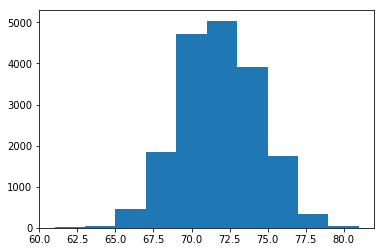

In [201]:
plt.hist(df.Height)

(array([1.061e+03, 3.679e+03, 4.019e+03, 3.852e+03, 2.971e+03, 1.687e+03,
        7.250e+02, 1.430e+02, 1.900e+01, 3.000e+00]),
 array([16. , 18.9, 21.8, 24.7, 27.6, 30.5, 33.4, 36.3, 39.2, 42.1, 45. ]),
 <a list of 10 Patch objects>)

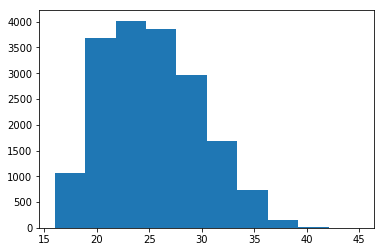

In [202]:
plt.hist(df.Age)

(array([ 703., 1241.,  228., 1024., 2751., 4007., 4656., 2768.,  719.,
          62.]),
 array([ 4., 13., 22., 31., 40., 49., 58., 67., 76., 85., 94.]),
 <a list of 10 Patch objects>)

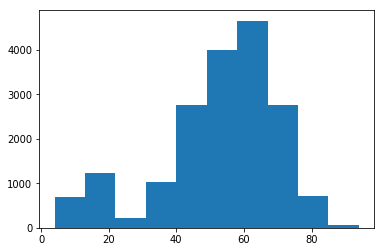

In [208]:
plt.hist(df.HeadingAccuracy)

### 7. Make a bar chart for the 10 countries with the most players (by nationality)
Bonus points for labeling axes and adding chart titles.

In [251]:
#code here to get the top 10 countries with the most players
df.Nationality.value_counts()[0:10]

England        1657
Germany        1195
Spain          1071
Argentina       936
France          911
Brazil          825
Italy           699
Colombia        616
Japan           478
Netherlands     452
Name: Nationality, dtype: int64

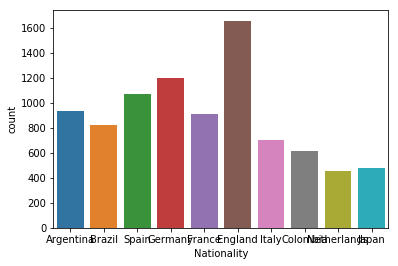

In [268]:
#code here to plot a bar chart
sns.countplot(
    df.loc[
        df['Nationality'].isin(df.Nationality.value_counts()[0:10].keys())
    ]['Nationality']
)